In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
dfs = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
csvs = ['sigmoid_no_Cape.csv', 'L1_loss_sigmoid.csv', 'L1_loss_MC.csv']
titles = ['sigmoid no Cape', 'sigmoid Cape', 'MC']

for i in range(len(dfs)):
	dfs[i] = pd.read_csv(csvs[i])

,Name,Created,Runtime,End Time,ID,Notes,Updated,Tags,n_split,Brier score 1 mm,...,KL 150 mm,KL 20 mm,KL 5 mm,KL 50 mm,rmse NWP 0,rmse NWP 1,rmse NWP 2,rmse NWP 3,train_loss,val_loss
0,warm-sweep-9,2024-05-08T12:28:18.000Z,831,2024-05-08T12:42:09.000Z,1xu2w1gw,-,2024-05-08T12:42:09.000Z,NaN,8,0.302629,...,0.011179,1.944253,5.714592,0.550534,16.008535,14.476096,15.870483,15.198743,0.115750,0.471686
1,crisp-sweep-8,2024-05-08T12:28:13.000Z,807,2024-05-08T12:41:40.000Z,mmatp4lo,-,2024-05-08T12:41:40.000Z,NaN,7,0.286074,...,0.053603,2.457512,4.755145,0.526529,16.064249,16.035679,18.103312,18.036352,0.104293,0.471252
2,gallant-sweep-7,2024-05-08T12:28:01.000Z,837,2024-05-08T12:41:58.000Z,m8k0i3fx,-,2024-05-08T12:41:58.000Z,NaN,6,0.269575,...,0.001548,1.502072,6.026958,0.495348,11.422435,11.902832,12.525249,12.216141,0.103001,0.466118
3,rose-sweep-6,2024-05-08T12:14:35.000Z,817,2024-05-08T12:28:12.000Z,4n97pomh,-,2024-05-08T12:28:12.000Z,NaN,5,0.294781,...,0.001469,2.141867,5.530343,0.384812,12.012112,11.015763,13.703030,13.243006,0.098571,0.473626
4,zany-sweep-5,2024-05-08T12:14:34.000Z,801,2024-05-08T12:27:55.000Z,hj3kq5d3,-,2024-05-08T12:27:55.000Z,NaN,4,0.295541,...,0.120932,1.496485,5.031172,0.744699,16.241982,15.490534,19.094954,19.474567,0.098956,0.493224


In [13]:
brier_scores = []
ECE = []
KL = []
thresholds = [1,5,10,20,50,100,150]
for i in range(len(dfs)):
    brier_scores.append(pd.DataFrame(columns=["mm", "brierScore"]))
    ECE.append(pd.DataFrame(columns=["mm", "ECE"]))
    KL.append(pd.DataFrame(columns=["mm", "KL"]))
    for th in thresholds:
        for d in dfs[i][f"Brier score {th} mm"].to_list():
            brier_scores[i] = pd.concat([brier_scores[i], pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
        for d in dfs[i][f"ECE {th} mm"].to_list():
            ECE[i] = pd.concat([ECE[i], pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
        for d in dfs[i][f"KL {th} mm"].to_list():
            KL[i] = pd.concat([KL[i], pd.DataFrame([[th, d]], columns=["mm", "KL"])], ignore_index=True)

/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_61088/2925534554.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  brier_scores[i] = pd.concat([brier_scores[i], pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_61088/2925534554.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ECE[i] = pd.concat([ECE[i], pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
/var/folders/30/xm8738cn5

Text(0.5, 1.0, 'BRIER SCORE')

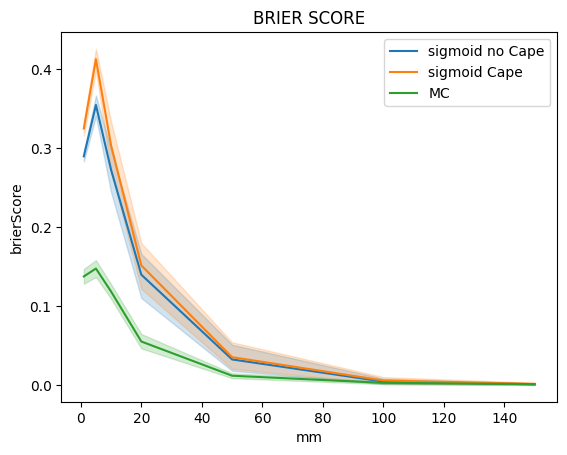

In [26]:
for i in range(len(dfs)):
	sns.lineplot(data=brier_scores[i], x="mm", y="brierScore", label=titles[i])
plt.legend()
plt.title("BRIER SCORE")

Text(0.5, 1.0, 'ECE')

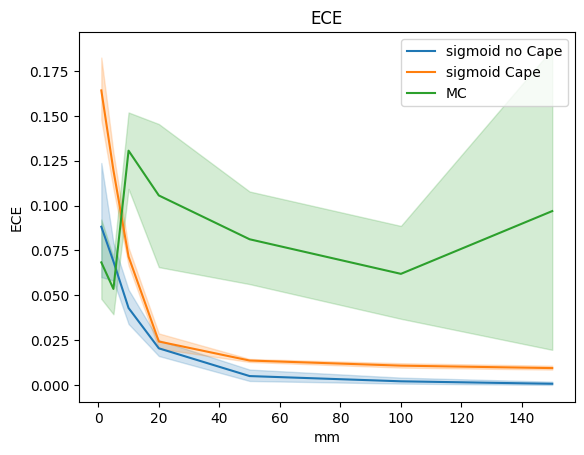

In [27]:
for i in range(len(dfs)):
	sns.lineplot(data=ECE[i], x="mm", y="ECE", label=titles[i])
plt.legend()
plt.title("ECE")

Text(0.5, 1.0, 'KL')

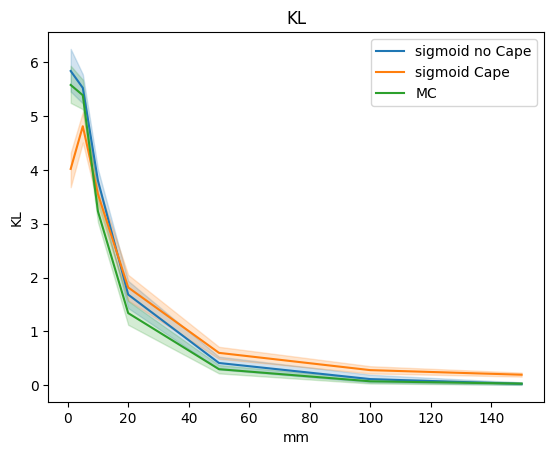

In [28]:
for i in range(len(dfs)):
	sns.lineplot(data=KL[i], x="mm", y="KL", label=titles[i])
plt.legend()
plt.title("KL")

In [30]:
rmse =dfs[2]["test rmse"].to_numpy()
print(f"MC: rmse mean: {np.mean(rmse):.4f},  var: {np.var(rmse):.4f}")

MC: rmse mean: 5.0599,  var: 1.4885
